<div >
<img src = "../banner.png" />
</div>

# Datos Espaciales. Fundamentos teóricos. 

Este *cuaderno* trata sobre datos espaciales. El objetivo del *cuaderno* es que usted aprenda a leer y obtener datos espaciales, identificar, proyectar, organizar, procesar y graficar datos espaciales usando `Python`.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaciomsarmiento/RecomSystemsLectures/blob/main/L08_Datos_Geograficos/L08_Datos_Geograficos.ipynb)

## Introducción


El análisis espacial es la rama de la estadística que se enfoca en el análisis de datos con propiedades espaciales, dentro de esto, encontramos a las coordenadas geográficas o topológicas. Se parece al análisis de series de tiempo en el punto en que el objetivo es analizar datos que cambian a lo largo de alguna dimensión. En el análisis de series de tiempo, los datos cambian a través de la dimensión del tiempo; mientras que en la estadística espacial, los datos cambian a lo largo de la dimensión espacial. 

Al igual que con la mayoría de los análisis estadísticos, en el análisis espacial, se trata de utilizar muestra de datos geográficos, utilizarlos para generar conocimientos y hacer predicciones. Por ejemplo, la estadística espacial se utiliza mucho para analizar el crimen. Al recopilar datos de ubicación de hechos delictivos, podemos generar mapas con áreas de alta y baja probabilidad de crimen, y así ayudar a los especialistas a determinar dónde es probable que ocurran futuros crímenes.


## Tipos de Datos Espaciales

Los datos espaciales vienen en muchas "formas" y "tamaños", los tipos más comunes de datos espaciales son:

- **Punto**: son la forma más básica de datos espaciales. Denota una ubicación de un sólo punto, como una parada de bus, un edificio, o cualquier otro objeto discreto definido en el espacio.

- **Líneas**: son un conjunto de puntos ordenados, conectados por segmentos de recta.

- **Polígonos**: denotan un área y pueden pensarse como una secuencia de puntos conectados, donde el primer punto es el mismo que el último. 

- **Grillas (*o raster*)**: son una colección de puntos o celdas rectangulares, organizadas en una red regular.

En este *cuaderno* nos concentraremos en las tres primeras formas: puntos, líneas y polígonos (pero te invito a que explores por ti mismo los formatos de grilla). Los dos formatos de archivos más utilizados para este tipo de datos son `shapefiles` y `geojson`. Estos formatos tienen algunas particularidades y por lo tanto es necesario que dediquemos parte de este cuaderno a explicarlas.

### Shapefiles

Los datos geoespaciales a menudo se almacenan en archivos `shapefile`. Este tipo de archivos almacena geometría no topológica, e información de atributos para las características espaciales en un conjunto de datos. Además, no requieren mucho espacio en disco, y son fáciles de leer y escribir (ESRI, 1998).

A diferencia de los archivos de texto que suelen ser autónomos y se componen de un único archivo, muchos formatos espaciales se componen de varios archivos. Los `shapefiles` están compuestos por tres o más archivos que deben conservar el mismo NOMBRE, y almacenarse en el mismo directorio (carpeta) de archivos para poder trabajar con ellos. Este formato de archivos suele ser muy utilizados por agencias gubernamentales para distribuir datos espaciales.

Los tres archivos principales asociados a `shapefiles` son:

   - Archivo principal: `file.shp`, es el archivo que contiene las geometrías.
   - Archivo de índice: `file.shx`, el archivo que indexa la geometría.
   - Tabla dBASE: `file.dbf`, es el archivo que almacena los atributos de las geometrías en un formato tabular.

Algunas veces los `shapefile` contienen archivos secundarios como:

   - Archivo de proyección: `file.prj`, contiene información sobre el sistema de coordenadas y la información de proyección. Es un archivo de texto sin formato que describe la proyección utilizando el formato de texto WKT.
   - Archivos de índice opcionales: `file.sbn` y `file.sbx`, estos son archivos índices que optimizan las busquedas espaciales.
    - Archivo de metadatos: `file.shp.xml`, contiene los metadatos geoespaciales en formato XML (por ejemplo, ISO 19115 o formato XML).
    
Nuevamente es importante reiterar que cuando trabajemos con un shapefile, debemos mantener juntos todos los tipos de archivo asociados. Y al compartirlos, *es importante comprimir todos estos archivos en un sólo paquete antes de enviárselo*


### GeoJSON

GeoJSON es otro formato muy popular para datos espaciales, se basa en un estándar abierto y los archivos terminan en extesiones con `.geojson` o `.json`. El código, a continuación muestra cómo representaríamos la ubicación de un punto, como ser la ubicación de la Universidad de Los Andes, en el formato GeoJSON. El formato nos dice que es de tipo punto (`Point`) y especificamos las coordenadas (`coordinates`): latitud de 4.601590 y longitud de -74.066391. Finalmente, incluye un atributo de nombre (`name`) cuyo valor es: Universidad de Los Andes.

`
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [-74.066391, 4.601590]
  },
  "properties": {
    "name": "Universidad de Los Andes"
  }
}
`

Además de puntos, uno puede representar en GeoJSON líneas y polígonos. Una de las ventajas de este formato es la simplicidad y facilidad de lectura, que permite editarlos en cualquier editor de texto simple.

Antes de ver cómo manejamos estos formatos en `Python` es importante hacer la aclaración que en el formato GeoJSON y Shapefile las cordenadas están ordenadas "al revés" como longitud-latitud a diferencia de otras herramientas como ser Google Maps, que pone los formatos latitud-longitud. Por ejemplo, la Universidad de Los Andes está ubicada en (-74.066391, 4.601590) según GeoJSON y Shapefile, pero (4.601590,-74.066391) según Google Maps. Ninguna de las formas es la correcta o equivocada, simplemente son distintas, y es importante saber con la que uno está trabajando. En esta [tabla](https://macwright.com/lonlat/) (MacWright, 2022) podemos ver como se ordenan las mismas en los distintos formatos.

## Trabajando con datos espaciales en `Python`

Para el trabajo con datos espaciales en `Python`, vamos a utilizar la librería [geopandas](https://geopandas.org/), que permite trabajar con datos geoespaciales de una forma relativamente sencilla. Geopandas combina las capacidades de análisis de datos de [pandas](https://pandas.pydata.org/pandas-docs/stable/) con otras librerías como [shapely](https://shapely.readthedocs.io/en/stable/manual.html) y [fiona](https://fiona.readthedocs.io/en/latest/manual.html) que sirven para manejar datos espaciales. 

Las principales estructuras de datos en [geopandas](https://geopandas.org/) son `GeoSeries` y `GeoDataFrame`, que amplían las capacidades de Series y DataFrames de [pandas](https://pandas.pydata.org/pandas-docs/stable/).  La principal diferencia entre `GeoDataFrames` y [pandas](https://pandas.pydata.org/pandas-docs/stable/) `DataFrames` es que un `GeoDataFrame` debe contener (al menos) una columna para geometrías. Por defecto, el nombre de esta columna es `geometry`. La columna de geometría es una `GeoSeries` que contiene las geometrías (puntos, líneas, polígonos, etc.) como objetos con forma.

Para ilustrar el manejo usaremos bases de datos que provienen de los [datos abiertos de Bogotá](https://datosabiertos.bogota.gov.co) y están disponibles en la carpeta de `datos`


### Vizualizaciones estáticas

#### Visualizando puntos

Comenzaremos visualizando la ubicación de los Establecimiento de Gastronomía y Bar en Bogotá D.C.

In [1]:
#Cargamos geopandas que es la librería a utilizar
import geopandas as gpd

#Cargamos los datos de establecimientos
bares = gpd.read_file("datos/egba") 


In [2]:
bares.head()

,SUBCATEGOR,NOMBRE_EST,DIRECCION,LOC,SECTOR_CAT,LATITUD,LONGITUD,geometry
0,L,CHIBCHOMBIA,CL 27 # 4 - 49 P 1,03,LA MACARENA,4.613799,-74.066259,POINT (-74.06626 4.61380)
1,L,RESTAURANTE ROMULO Y REMO MACARENA,KR 4A # 26D - 90,03,LA MACARENA,4.613799,-74.066259,POINT (-74.06626 4.61380)
2,L,BOGOTA BEER COMPANY S A,KR 4A # 27 - 3,03,LA MACARENA,4.614092,-74.065890,POINT (-74.06589 4.61409)
3,L,PRESTO BTA CALLE 27,KR 7 # 27 - 38 LC 1 ED COLISSEUM,03,SAN DIEGO,4.614158,-74.069222,POINT (-74.06922 4.61416)
4,L,LA HAMBURGUESERIA DE LA MACARENA,KR 4A # 27 - 27,03,LA MACARENA,4.614193,-74.066440,POINT (-74.06644 4.61419)


Esta base contiene la subcategoría a la que el establecimiento pertenece, el nombre, la dirección, la localidad, el sector, la latitud y longitud, y por último la geometría que nos dice que son puntos, y están en el formato longitud-latitud. Podemos ver también cierta información básica sobre este `GeoDataFrame` con la función `info`:

In [3]:
bares.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SUBCATEGOR  515 non-null    object  
 1   NOMBRE_EST  515 non-null    object  
 2   DIRECCION   515 non-null    object  
 3   LOC         515 non-null    object  
 4   SECTOR_CAT  515 non-null    object  
 5   LATITUD     515 non-null    float64 
 6   LONGITUD    515 non-null    float64 
 7   geometry    515 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 32.3+ KB


Para vizualizar los bares podemos simplemente usar la función `plot()`, donde se puede ver que la base representa puntos a lo largo de latitud y longitud.

<AxesSubplot:>

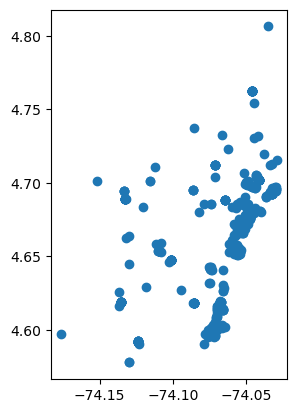

In [4]:
bares.plot()

Podemos mejorar esta gráfica usando `matplotlib`:

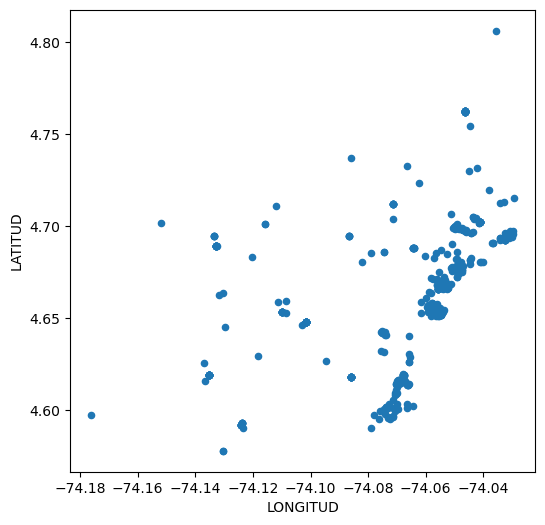

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6), dpi = 100)
bares.plot(kind = 'scatter', x = 'LONGITUD', y = 'LATITUD', ax = ax);

#### Visualizando líneas

De la misma forma podemos visualizar líneas, por ejemplo las ciclovías de Bogotá:

In [6]:
ciclovias = gpd.read_file("datos/Ciclovia")
ciclovias.head()

,geometry
0,"LINESTRING (-8244958.948 530530.133, -8244985...."
1,"MULTILINESTRING ((-8246678.856 523985.570, -82..."
2,"MULTILINESTRING ((-8244495.803 519237.310, -82..."
3,"MULTILINESTRING ((-8241247.760 526629.949, -82..."
4,"MULTILINESTRING ((-8248013.366 518434.151, -82..."


Este archivo por ejemplo sólo contiene las líneas sin información adicional. Graficándolas tenemos: 

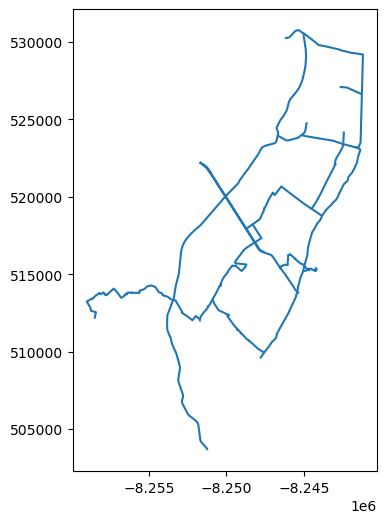

In [7]:
fig, ax = plt.subplots(figsize = (6, 6), dpi = 100)
ciclovias.plot(ax = ax);

#### Visualizando polígonos

Para visualizar polígons procedemos de la misma forma. En este caso vamos a visualizar las Unidades de Planeamiento Local (UPL) de Bogotá:

In [8]:
upla = gpd.read_file("datos/upla")

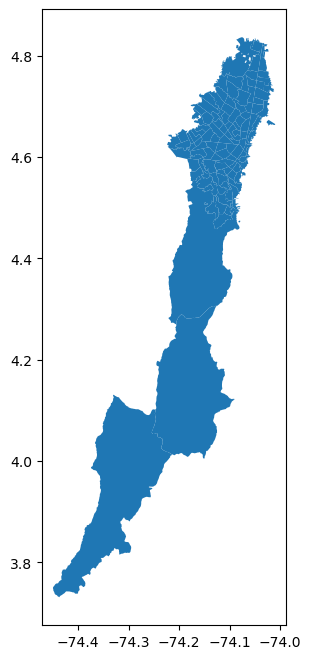

In [9]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
upla.plot(ax = ax);

Este archivo contiene variada información sobre las UPL, entre ellas su área:

In [10]:
upla.head()

,UPlCodigo,UPlTipo,UPlNombre,UPlAAdmini,UPlArea,SHAPE_Leng,SHAPE_Area,geometry
0,UPZ100,1,GALERIAS,Dec 621 de 2006,2.375681e+06,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.06619 4.64146..."
1,UPZ83,1,LAS MARGARITAS,None,1.472415e+06,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17141 4.62811..."
2,UPZ107,1,QUINTA PAREDES,Dec 086 de 2011,1.739560e+06,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09184 4.63569..."
3,UPZ101,1,TEUSAQUILLO,"Dec 492 de 2007 Mod.=Res 253 de 2009, Dec 591 ...",2.357008e+06,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.06840 4.62882..."
4,UPZ91,1,SAGRADO CORAZON,"Dec 492 de 2007 Mod.=Res 249 de 2009, Dec 093 ...",1.467630e+06,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06570 4.62554..."


¿Qué podemos utilizar para graficar? Por ejemplo escoger el color de relleno de los polígonos según su área (contenida en la variable `UPlArea`). Para esto usaremos el argumento `column` para escoger la columna que va a definir el color de los polígonos y el argumento `legened=True` para visualizar qué significa el color de relleno.

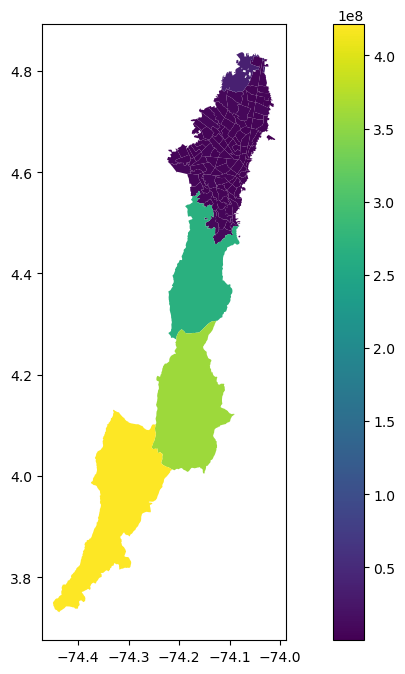

In [11]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
upla.plot(ax = ax, column = "UPlArea", legend = True);

#### Visualizando puntos, líneas, y polígonos

Podemos también combinar los gráficos anteriores y operar sobre las bases. Por ejemplo, combinemos vizualizaciones de bares, ciclovías, y las UPL en la misma gráfica. Para apreciarlo mejor filtraremos tres localidades del sur de Bogotá que corresponden a la zona rural de la ciudad: Río Blanco, Río Sumapaz y Río Tunjuelo.

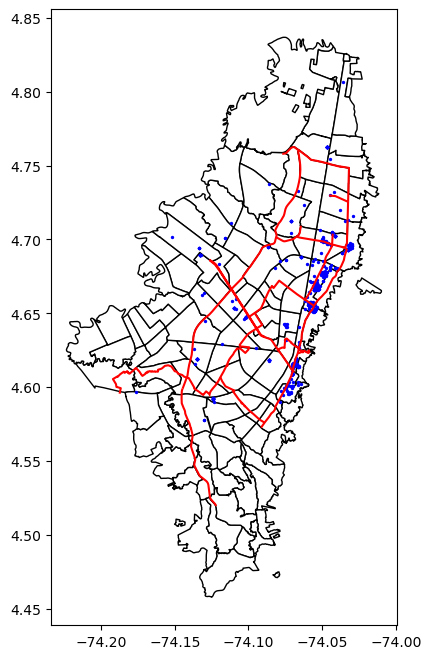

In [12]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
filtro = ~upla["UPlNombre"].str.contains("RIO")
upla.loc[filtro,:].plot(ax = ax, color = 'white', edgecolor = 'black');
ciclovias.to_crs(4686).plot(ax = ax, color = "red"); # Note que la ciclovía está en un sistema de
# coordenadas diferente a upla y bares por lo que se debe transformar (más de esto más abajo en el cuaderno)
bares.plot(ax = ax, markersize = 2, color = "blue");

## Adquiriendo datos espaciales abiertos: [OpenStreetMap](https://www.openstreetmap.org/)


OpenStreetMap (OSM) es probablemente la base de datos espacial abierta más conocida y ampliamente utilizada en el mundo. Esta base, de licencia abierta y gratuita, contiene mapas e información geográfica construida por voluntarios alrededor del mundo.

Veremos en esta sección cómo podemos recuperar datos de OSM utilizando la librería `pirosm`. OSM es una "base de datos del mundo", y por lo tanto contiene información sobre varias cosas: Con `pirosm` se pueden descargar y extraer datos  sobre:

   - Calles, con la función `osm.get_network()`
   - Edificios, con la función `osm.get_buildings()`
   - Puntos de interés, con la función `osm.get_pois()`
   - Uso de la tierra, con la función `osm.get_landuse()`
   - Elementos naturales, con la función `osm.get_natural()`
   - Fronteras, con la función `osm.get_boundaries()`

Para ilustrarlo descarguemos los supermercados en Bogotá:

In [13]:
from pyrosm import OSM, get_data

# Bajamos los datos para  Bogotá
fp = get_data("Bogota")

# Inicializamos el lector para Bogotá
osm = OSM(fp)

In [14]:
#Obtenenemos los supermecados
super = osm.get_pois(custom_filter={"shop":["supermarket"]})
len(super)

/Users/iggy/opt/anaconda3/lib/python3.9/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


1506

In [15]:
super.head()

,lat,id,timestamp,tags,changeset,lon,version,addr:city,addr:full,addr:housenumber,...,name,opening_hours,operator,phone,website,organic,shop,geometry,osm_type,addr:country
0,4.726381,265686842,0,None,0.0,-74.060181,0,None,None,None,...,Carulla,None,None,None,None,None,supermarket,POINT (-74.06018 4.72638),node,NaN
1,4.681126,345260678,0,None,0.0,-74.049553,0,None,None,None,...,Chico Centro,None,None,None,None,None,supermarket,POINT (-74.04955 4.68113),node,NaN
2,4.698651,356119972,0,"{""brand"":""Ol\u00EDmpica"",""brand:wikidata"":""Q24...",0.0,-74.042747,0,None,None,None,...,Olímpica,None,Olimpica,None,None,None,supermarket,POINT (-74.04275 4.69865),node,NaN
3,4.694653,356121996,0,None,0.0,-74.056602,0,None,None,None,...,None,None,Surtifruver,None,None,None,supermarket,POINT (-74.05660 4.69465),node,NaN
4,4.699185,361325638,0,"{""wheelchair"":""yes""}",0.0,-74.029388,0,None,None,None,...,Supermercado Colsubsidio,None,None,None,None,None,supermarket,POINT (-74.02939 4.69918),node,NaN


Obtuvimos entonces datos de 1478 supermercados con su ubicación en la ciudad, que podemos también agregar a nuestro mapa anterior. Notemos además que esta base contiene tanto puntos como polígonos.

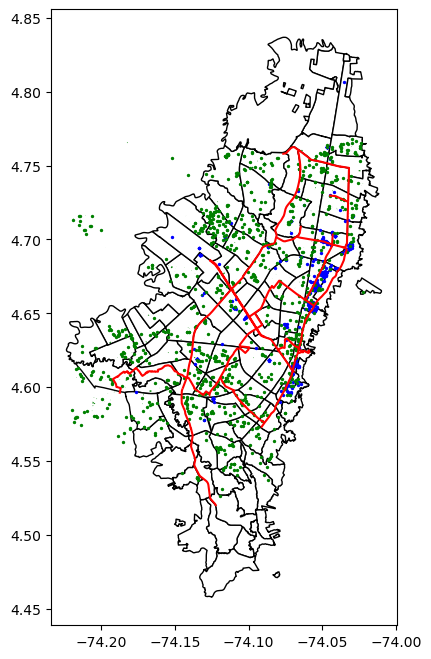

In [16]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
filtro = ~upla["UPlNombre"].str.contains("RIO")
upla.loc[filtro,:].plot(ax = ax, color = 'white', edgecolor = 'black');
ciclovias.to_crs(4686).plot(ax = ax, color = "red"); 
bares.plot(ax = ax, markersize = 2, color = "blue");
super.plot(ax = ax, markersize = 2, color = "green");

## Proyecciones geográficas


La Tierra no es plana. El mundo es un elipsoide de forma irregular, pero los dispositivos en los que representamos los mapas tienen sólo dos dimensiones. Para representar la Tierra, se la reproyecta en un mapa plano. 

La proyección cartográfica elegida determinará cómo se transforman y distorsionan latitudes y longitudes para preservar algunas de las propiedades del mapa: área, forma, distancia, dirección o rumbo. Por ejemplo, los marineros usan la proyección de Mercator donde los meridianos y los paralelos se cruzan entre sí siempre en el mismo ángulo de 90 grados. Les permite ubicarse fácilmente en la línea que muestra la dirección en la que navegan. Pero la proyección no conserva las distancias. 

El sigiente `.gif` ilustra cómo la proyección Mercator "aplana" la tierra:

In [17]:
from IPython.display import IFrame
IFrame('figs/Projections.gif', width=700, height=350)

Entonces, las proyecciones cartográficas intentan representar la superficie de la tierra o una parte de ella, en una superficie plana de papel o en la pantalla del computador.

El sistema de coordenadas de referencia (o `CRS` por sus siglas en ingles) define con la ayuda de las coordenadas, cómo la representación bidimensional de la tierra se relaciona con la ubicación real en la tierra. 

Existen varios `CRS` y la eleccion dependerá de lo que se quiere hacer. Roger Bivand y coautores (2013)  plasman esto de manera muy clara: “No existen proyecciones para todos los propósitos, todas implican distorsión cuando están lejos del centro del marco especificado” 

Por ejemplo tenemos sistemas de coordenadas que abarcan todo el globo terráqueo y sirven para ubicar cualquier punto de la Tierra sin necesitar otro punto de referencia. El más popular es el WGS84 (World Geodetic System 1984), cuyo código EPSG: 4326 (EPSG es un registro público con todas las proyecciones y su respectivo código).

Por otro lado, los sistemas de coordenadas proyectadas que se focalizan le dicen al computador cómo graficar en usa superficie plana para minimizar la distorsión visual en una región particular. Por ejemplo, para Colombia se recomienda utilizar el  MAGNA-SIRGAS cuyo código EPSG : 4626.


Volviendo un poco a las bases anteriores, notemos que las latitudes y longitudes, de las ciclovías están expresadas de forma diferente que el resto. Esto se debe a que están en una proyección diferente. ¿Cómo podemos ver en que proyección están los datos? Para ello usamos la función `.crs`

In [18]:
ciclovias.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

En este caso, están en Pseudo-Mercator (EPSG: 3857) mientras que la base de bares está en la proyección recomendada para Colombia: MAGNA-SIRGAS

In [19]:
bares.crs   

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Para poder graficar y trabajar con estas bases es importante siempre verificar las proyección en la que se encuentran y homogeneizarlas, para ello se puede usar la función `.to_crs`. 

In [20]:
ciclovias=ciclovias.to_crs(4686)
ciclovias.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Esto será especialmente importante para medir distancias.

## Midiendo distancias

Cuando trabajamos con datos geográficos a menudo nos va a interesar medir distancias, esto será especialmente importante cuando queremos agrupar datos y encontrar "puntos calientes". Para demostrarlo, generaremos datos espaciales, creando primero un `DataFrame` con [pandas](https://pandas.pydata.org/pandas-docs/stable/) y luego transformarlo a un `GeoDataFrame` de [geopandas](https://geopandas.org/).

Para nuestro ejemplo vamos a medir la distancia entre la Universidad de Los Andes y el Banco de la República. Entonces primero generamos el DataFrame que tiene columnas: lugar, latitud y longitud.


In [21]:
import pandas as pd
db = pd.DataFrame({
    "lugar": ["Uniandes", "Banco de la República"],
    "lat": [4.601590, 4.602151],
    "long": [-74.066391, -74.07221]
    })
db

,lugar,lat,long
0,Uniandes,4.601590,-74.066391
1,Banco de la República,4.602151,-74.072210


Lo transformamos a un `GeoDataFrame` especificando que la geometría son puntos que surgen de la latitud y longitud:

In [22]:
db = gpd.GeoDataFrame(db, geometry = gpd.points_from_xy(db.long, db.lat))
db

,lugar,lat,long,geometry
0,Uniandes,4.601590,-74.066391,POINT (-74.06639 4.60159)
1,Banco de la República,4.602151,-74.072210,POINT (-74.07221 4.60215)


Definimos la proyección WGS84, ya que tenemos la latidues y longitudes que los ubican en el mapa, pero luego lo proyectamos a MAGNA-SIRGAS para tener la proyección que corresponde a Bogotá.

In [23]:
db.crs = "EPSG:4326"
db=db.to_crs(4686)

Antes de calcular la distancia, grafiquemos las ubicaciones en sus respectivas UPLs.

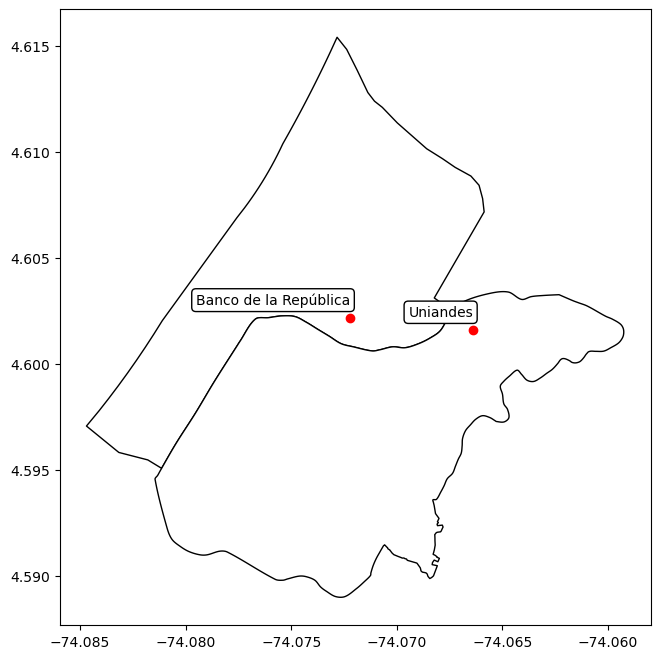

In [24]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
# La Universidad de los Andes y el Banco de la República quedan en las localidades 
filtro = upla.UPlNombre.isin(["LA CANDELARIA", "LAS NIEVES"])
upla.loc[filtro,:].plot(ax = ax, color = "white", edgecolor = "black");
db.plot(ax = ax, color = "red");

# Para poder crear una marcación de los lugares necesitamos desempaquetar la geometría
db["coordenadas"] = db["geometry"].apply(lambda x: x.representative_point().coords[:][0])
for idx, fila in db.iterrows():
    plt.annotate(text = fila['lugar'], xy = fila['coordenadas'], 
        textcoords = 'offset points', xytext = (0, 10), ha = 'right',
        bbox = dict(boxstyle = "round", fc = "white"))

Para calcuar la distancia   entre Uniandes y el Banco de la República vamos a utilizar la función `distance` de la librería [geopy](https://geopy.readthedocs.io/en/stable/). [Geopy](https://geopy.readthedocs.io/en/stable/) es un cliente de `Python` que permite acceder a servicios web de geocodificación populares y facilita el cálculo de distancias entre ubicaciones.

In [25]:
from geopy.distance import geodesic

coords_1 = db.coordenadas[0]
coords_2 = db.coordenadas[1]


geodesic(coords_1, coords_2).m


649.6801561296176

[Geopy](https://geopy.readthedocs.io/en/stable/) nos dice entonces que la distancia entre el Banco de la República y Uniandes es aproximadamente 650 metros. Esta distancia es aproximadamente la misma que obtenemos si la medimos directamente en  [Google Maps](https://www.google.com/maps/dir/4.602146,+-74.07221/4.601590,+-74.066391/@4.6013775,-74.0736601,16z/data=!3m1!4b1!4m10!4m9!1m3!2m2!1d-74.07221!2d4.602146!1m3!2m2!1d-74.066391!2d4.60159!3e2)

![distancia_uniandes_banco](figs/distancia.png)

El cálculo de distancias no se limita sólo a calcular la distancia entre dos puntos, podemos también hacerlo entre puntos y líneas. Por ejemplo, podemos calcular la distancia de Uniandes y el BanRep a las ciclovías. 

Como vamos a calcular la distancia de una línea a un punto, primero calculamos el punto perteneciente a la línea que está más cercano al punto. A modo de ilustración mostraremos el punto más cercano de la primera ciclovía a Uniandes.

Para encontrar el punto más cercano usamos la función `nearest_points` de [shapely](https://shapely.readthedocs.io/en/stable/manual.html):

In [26]:
from shapely.ops import nearest_points

ciclovia = ciclovias.geometry[0]
uniandes = db.geometry[0]
punto_cercano = nearest_points(ciclovia, uniandes)[0]
punto_cercano.coords[:][0]

(-74.09933499981858, 4.681028500156322)

Encontrado el punto más cercano, visualicémoslo:

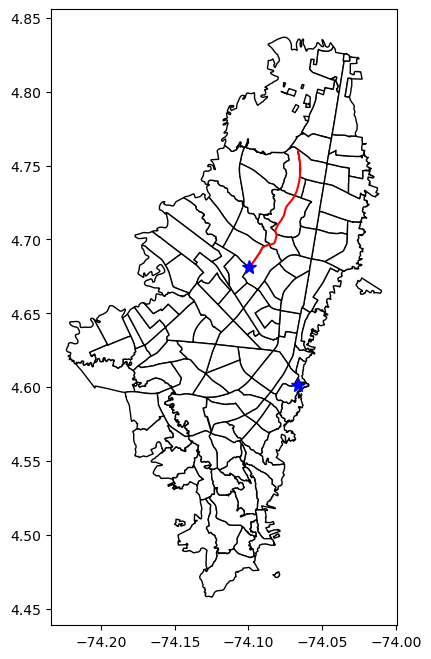

In [27]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
filtro = ~upla["UPlNombre"].str.contains("RIO")
upla.loc[filtro,:].plot(ax = ax, color = 'white', edgecolor = 'black');
ciclovias.iloc[0:1,:].plot(ax = ax, color = "red"); 
plt.plot(*uniandes.coords[:][0], "*", color = "b", markersize = 10);
plt.plot(*punto_cercano.coords[:][0], "*", color = "b", markersize = 10);

Y calculemos la distancia:

In [28]:
coords_1 = [[punto_cercano.coords[:][0][1], punto_cercano.coords[:][0][0]]]
coords_2 = [[uniandes.coords[:][0][1], uniandes.coords[:][0][0]]]

geodesic(coords_1, coords_2).km

9.514616627186722

La distancia entre Uniandes y la ciclovía es de 4.4 kilometros.  Un punto importante a notar es que [geopandas](https://geopandas.org/) guarda las coordenadas como (lon, lat), pero  [geopy](https://geopy.readthedocs.io/en/stable/) las interpreta  al revés (lat, lon).

Calculemos ahora iterativamente  todas las distancias entre las ciclovías, Uniandes y el Banco de la República que vamos a almacenar en el `DataFrame: distancias`

In [29]:
distancias = pd.DataFrame(columns = ["Lugar", "Lugar coordenadas", "Ciclovía", 
    "Punto cercano", "Distancia"])


for p in range(db.shape[0]):
    punto = db.geometry[p]
    lugar = db.lugar[p]
    for c in range(ciclovias.shape[0]):
        ciclovia = ciclovias.geometry[c]
        punto_cercano = nearest_points(ciclovia, punto)[0]
        distancia = geodesic(
            (punto_cercano.coords[:][0][1], punto_cercano.coords[:][0][0]),
            (punto.coords[:][0][1], punto.coords[:][0][0])).km
        distancias = distancias.append({
            "Lugar": lugar, 
            "Lugar coordenadas": punto.coords[:][0],
            "Ciclovía": ciclovias.geometry[0].coords[:],
            "Punto cercano": punto_cercano.coords[:][0],
            "Distancia": distancia}, ignore_index=True)

/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T/ipykernel_11259/2772451381.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distancias = distancias.append({
/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T/ipykernel_11259/2772451381.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distancias = distancias.append({
/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T/ipykernel_11259/2772451381.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distancias = distancias.append({
/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T/ipykernel_11259/2772451381.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distancias = distancias.appen

In [30]:
distancias

,Lugar,Lugar coordenadas,Ciclovía,Punto cercano,Distancia
0,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.09933499981858, 4.681028500156322)",9.514617
1,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.07534630043656, 4.698749500142882)",10.789900
2,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.05537869921812, 4.655037399830839)",6.035283
3,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.03274159962268, 4.712836499631161)",12.855895
4,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.0553975000587, 4.654946500099967)",6.025017
5,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.13897589979534, 4.620164300432467)",8.311916
6,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.10024160026457, 4.625280600549511)",4.579450
7,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.07244938458894, 4.604421479308411)",0.741596
8,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.06887450026153, 4.610310000048883)",1.002875
9,Uniandes,"(-74.066391, 4.60159)","[(-74.06572639926411, 4.760347099936292), (-74...","(-74.09931490001411, 4.647512300501227)",6.255692


Tenemos entonces todas las distancias entre Uniandes y el BanRep, y los puntos más cercanos de las ciclovías.

## Uniones espaciales

Otra operación que usamos a menudo, es  la unión espacial. Siguiendo el ejemplo anterior, supongamos que queremos agregar una columna a nuestra `db` que indique la UPL a la cual pertencen. Para esto podemos usar una unión espacial que va a unir la información entre dos bases espaciales.

Para esta operación utilizaremos la funcion `sjoin()`:

In [31]:
upla.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
db.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
union = gpd.sjoin(db, upla)

union

,lugar,lat,long,geometry,coordenadas,index_right,UPlCodigo,UPlTipo,UPlNombre,UPlAAdmini,UPlArea,SHAPE_Leng,SHAPE_Area
0,Uniandes,4.601590,-74.066391,POINT (-74.06639 4.60159),"(-74.066391, 4.60159)",86,UPZ94,1,LA CANDELARIA,"Dec 492 de 2007 Mod.=Dec 172 de 2010, 336 de 2...",2.060243e+06,0.067156,0.000168
1,Banco de la República,4.602151,-74.072210,POINT (-74.07221 4.60215),"(-74.07221, 4.602151)",29,UPZ93,1,LAS NIEVES,"Dec 492 de 2007 Mod.=Dec 486 de 2017, 791 de 2...",1.725739e+06,0.061851,0.000141


Podemos ver entonces que se crearon nuevas columnas con la información de las UPLs. Para Uniandes aparece que está en La Candelaria y para el BanRep en Las Nieves.

## Visualizaciones interactivas

`Python` ofrece además la capacidad de generar visualizaciones interactivas, en esta sección usaremos la librerías [folium](https://pypi.org/project/folium/) y [Bokeh](https://bokeh.org/) para generar estas visualizaciones. 

La forma más sencilla de visualizar nuestros datos sobre un mapa interactivo es haciendo uso de la librería [folium](https://pypi.org/project/folium/). 

Esta libreria requiere que primero especifiquemos la capa base del mapa y luego se le agregen las capas deseadas:

In [1]:
#importamos la librería
import folium

#Mapa base
map = folium.Map(location = [4.65283,-74.054339], tiles = "OpenStreetMap", zoom_start = 10)
# Otras opciones de tiles
#Stamen Terrain, Toner, and Watercolor

#capa bares
for i in range(0,len(bares)):
   folium.Marker(
      location=[bares.iloc[i]['LATITUD'], bares.iloc[i]['LONGITUD']],
       popup=bares.iloc[i]['NOMBRE_EST'],
   ).add_to(map)


#Display el mapa
map


NameError: name 'bares' is not defined

Podemos también agregar la capa de los polígonos de las UPL 

In [35]:
#Primero removemos las UPL cuyo nombre contienen Rio
upla_filt=upla.loc[~upla["UPlNombre"].str.contains("RIO"),:]

#Agregamos la capa de polígonos con un popup con el nombre de la UPL
for _, r in upla_filt.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['UPlNombre']).add_to(geo_j)
    geo_j.add_to(map)

map

Finalmente agregamos la ciclovias:

In [36]:
#Agregamos la capa de lineas para las ciclovias
ciclo=ciclovias.to_crs(4686)

folium.Choropleth(
 ciclo,
    line_weight=2,
    line_color='red'
).add_to(map)

map

[Folium](https://pypi.org/project/folium/) entonces nos permite con facilidad ubicar nuestros datos en un mapa interactivo. 

Notemos que omití graficar los supermercados, esto se debe a que al ser más de 1000 datos le puede tomar a [folium](https://pypi.org/project/folium/) un tiempo considerable graficarlos. 


Para superar esto una excelente alternativa  es [bokeh](https://bokeh.org/), un submódulo de la librería [datashader](https://datashader.org/). (Te invito que explores este  [enlace](https://anaconda.org/jbednar/nyc_taxi/notebook) para ver más detalles sobre este submódulo).

Este paquete, sin embargo, es un poco más técnico que [folium](https://pypi.org/project/folium/)  por lo cual requiere que se transformen los datos antes de visualizarlos. Lo primero será quedarnos con los puntos y desechar los polígonos:

In [37]:
from shapely.geometry import Point

#Removemos algunos supermercados sin latitudes y longitudes
super_points=super[super.geom_type=="Point"]
len(super_points)

1037

Luego convertimos los puntos en un objeto `GeoSeries`. Notemos que estamos definiendo explicitamente la proyección inicial de los puntos:

In [38]:
# Convertimos los puntos en un objeto GeoSeries.
xys_wb = gpd.GeoSeries(super_points.geometry, crs = "epsg:4326")

Este paquete requiere además que los datos se encuentre en proyección Web Mercator, EPSG: 3857:

In [39]:
# Vamos a reproyectar a Web Mercator
xys_wb = xys_wb.to_crs(epsg = 3857)

Require ademas que las coordenadas esten separadas:

In [40]:
# Separamos las coordenadas en x e y
x_wb = xys_wb.apply(lambda i: i.x)
y_wb = xys_wb.apply(lambda i: i.y)

Ahora que tenemos nuestros objetos en el formato adecuado, vamos a crear una función para visualizar el mapa con [bokeh](https://bokeh.org/). 

In [41]:
from bokeh.plotting import figure, output_notebook, show

Para graficar necesitamos una serie de pasos:

1) Indicar que se va a desplegar dentro de un Jupyter Notebook:

In [42]:
output_notebook() 

Loading BokehJS ...

2) Delimitamos los bordes del mapa, para ello podemos usar los valores máximos y mínimos de las coordenas a graficar:

In [43]:
# Extraemos los puntos más extremos para definir los límites del mapa
minx, miny, maxx, maxy = xys_wb.total_bounds
y_range = miny, maxy 
x_range = minx, maxx 


3) Definimos el gráfico base, con estos valores mínimos, tamaño de la gráfica y otras opciones, como ser el color y el tamaño:

In [44]:
def base_plot(tools = 'pan,wheel_zoom,reset', plot_width = 600, plot_height = 400, **plot_args):
    p = figure(tools = tools, plot_width = plot_width, plot_height = plot_height,
        x_range = x_range, y_range = y_range, outline_line_color = None,
        min_border = 0, min_border_left = 0, min_border_right = 0,
        min_border_top = 0, min_border_bottom = 0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

# Definimos que nuestros puntos tengan color morado (#800080) y sean de tamaño 4
options = dict(line_color = None, fill_color = '#800080', size = 4)

4) Definimos la capa base. Para ello necesitamos importar un proveedor de los servicios de cartografía. Este proveedor será el que visualizará las calles, ríos, parques, nombres de las ciudades, etc. Para ver los proveedores disponibles puede ingresar a https://docs.bokeh.org/en/latest/docs/reference/tile_providers.html#bokeh-tile-providers

In [45]:
from bokeh.tile_providers import STAMEN_TERRAIN, get_provider

Estamos ahora en condiciones de llamar el mapa base, con la capa del proveedor que elegimos, añadimos la ubicaciones de los supermercados y visualizamos:

In [46]:

# Creamos un mapa delimitado por las coordenadas más extremas 
p = base_plot()

cartografia = get_provider(STAMEN_TERRAIN)
p.add_tile(cartografia)

# Le añadimos las ubicaciones de los supermercados como puntos
p.circle(x = x_wb, y = y_wb, **options)

# Visualizamos nuestro mapa
show(p)

Note que [bokeh](https://bokeh.org/) es sustancialmente más veloz que [folium](https://pypi.org/project/folium/), pero también más intrincado.


# Referencias

- Bivand, R. S., Pebesma, E. J., Gómez-Rubio, V., & Pebesma, E. J. (2008). Applied spatial data analysis with R (Vol. 747248717, pp. 237-268). New York: Springer.
- Dougherty, J., & Ilyankou, I. (2021). "Hands-On Data Visualization".  O'Reilly Media, Inc.
- ESRI, Environmental Systems Research Institute. (1998). “ESRI Shapefile Technical Description.” Disponible en: https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf. Accedido el 04/02/2022
- MacWright, T. "lon lat lon lat". Disponible en https://macwright.com/lonlat/. Accedido el 04/02/2022
- Tenkanen, H. "Spatial data science for sustainable development". Disponible en https://sustainability-gis.readthedocs.io/en/latest/index.html. Accedido el 04/02/2022